### Guilherme Michel Lima de Carvalho
### Jaqueline Lopes Dias
### Marcos Jardel Henriques



## Article:
Binary Classification: A comparative study of machine learning algorithms using Pima Indians dataset.



**Description of data**:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


**Content**:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


## Exploratory Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [564]:
pima_dataset = pd.read_csv('diabetes.csv')

In [7]:
#pima_dataset.shape()
pima_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

### Scatterplot

In [10]:
import seaborn as sns

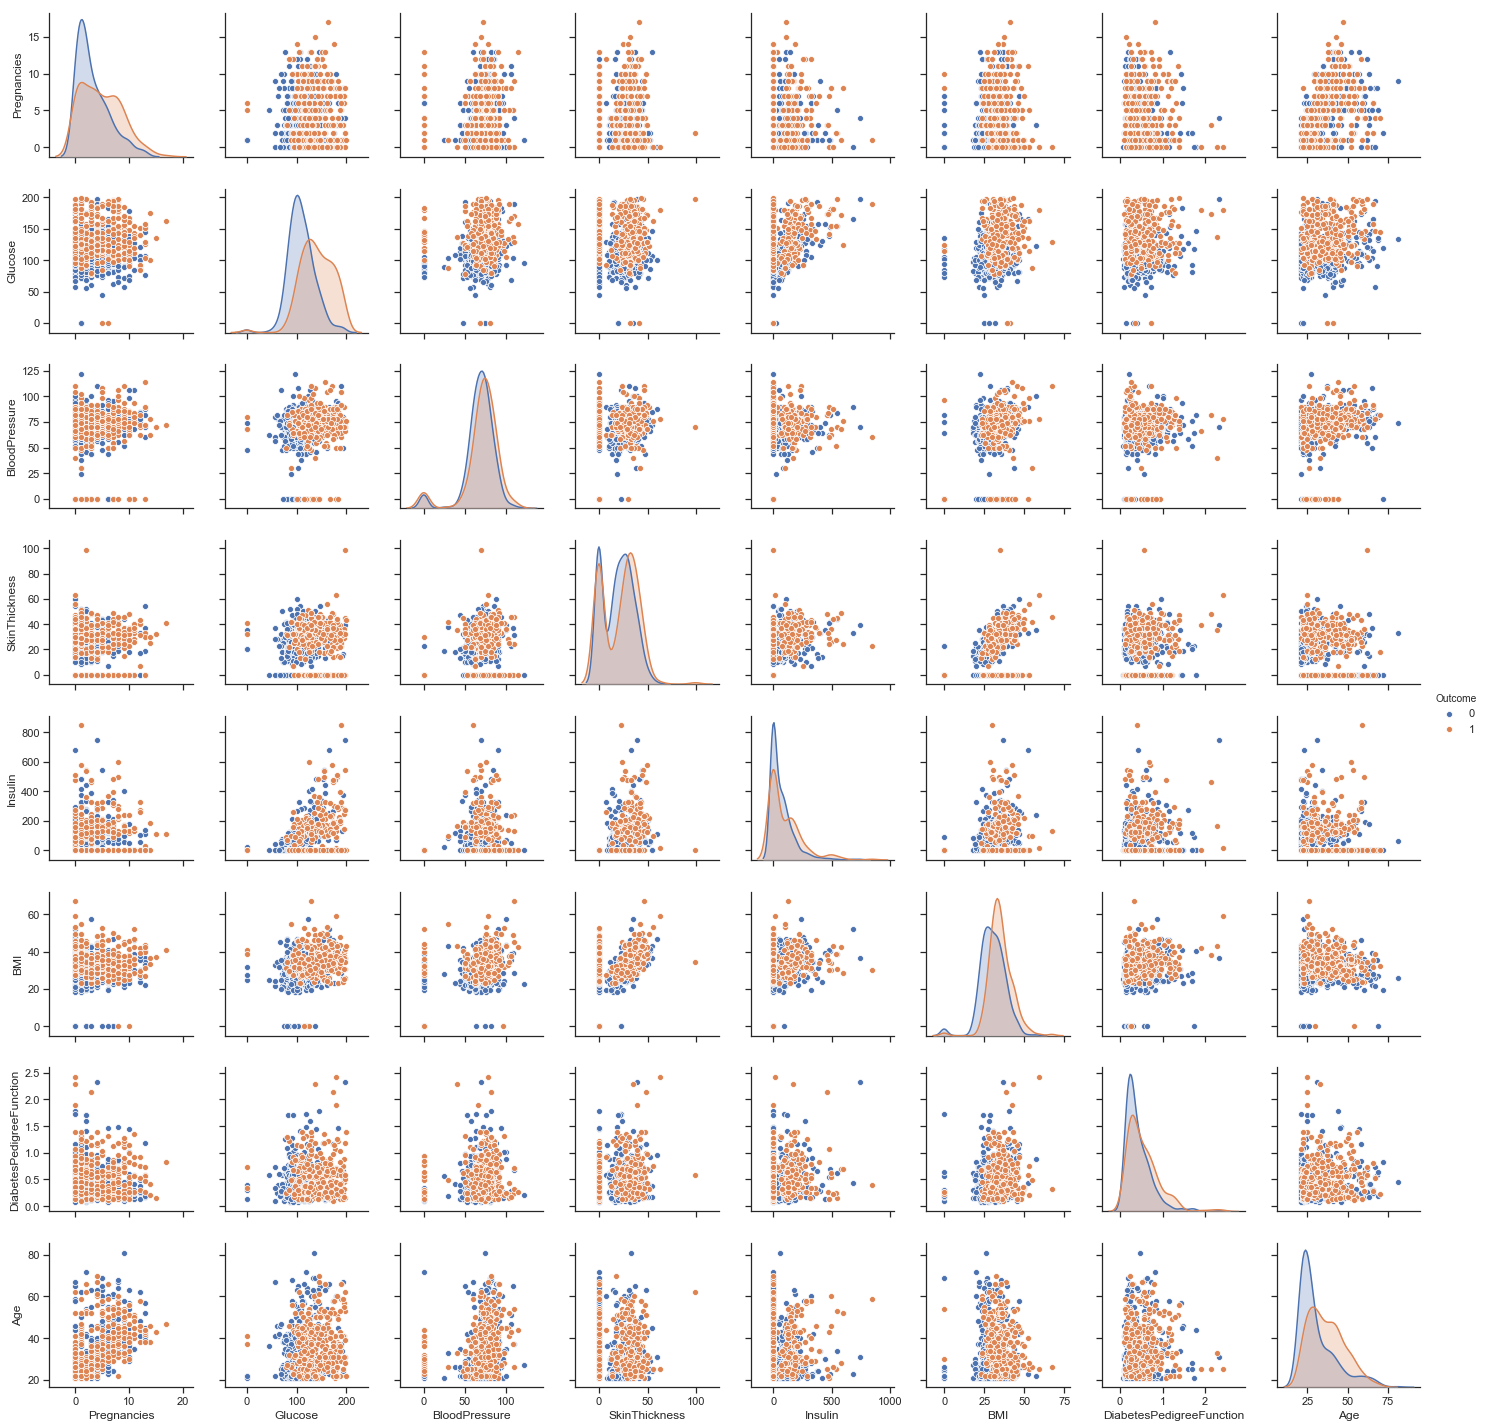

In [11]:
sns.set(style="ticks")
sns.pairplot(pima_dataset,vars=names,hue="Outcome")

In this pairplot we can see some variables that are very important for the model because the distribution in the classes are much different. In this case we have: Pregnancies, Glucose and Age.

In [386]:
diabetes = pima_dataset[pima_dataset['Outcome'] == 1]
not_diabetes = pima_dataset[pima_dataset['Outcome'] == 0]

Text(0, 0.5, 'Frequency')

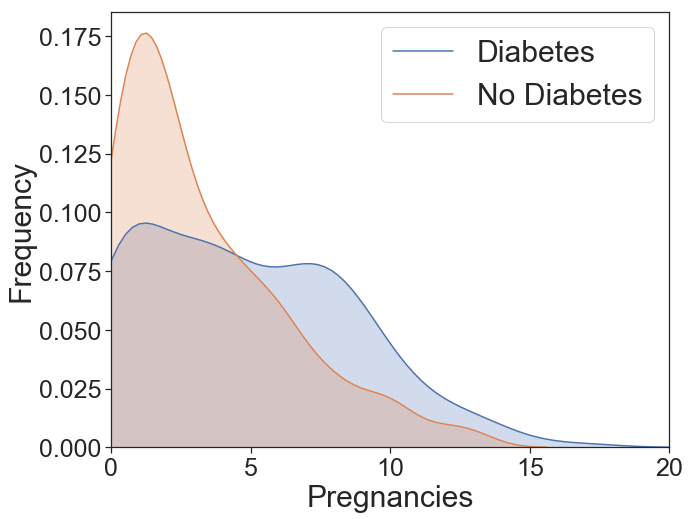

In [423]:
plt.figure(figsize=(10,8))

ax1 = sns.kdeplot(diabetes['Pregnancies'],shade=True)
ax1.set_xlim((0,20))
ax1.tick_params(labelsize=25)

ax2 = sns.kdeplot(not_diabetes['Pregnancies'],shade=True)
ax2.set_xlim((0,20))
ax2.tick_params(labelsize=25)

plt.legend(['Diabetes','No Diabetes'],loc='upper right',fontsize=30)
plt.xlabel('Pregnancies',fontsize=30)
plt.ylabel('Frequency',fontsize=30)


Text(0, 0.5, 'Frequency')

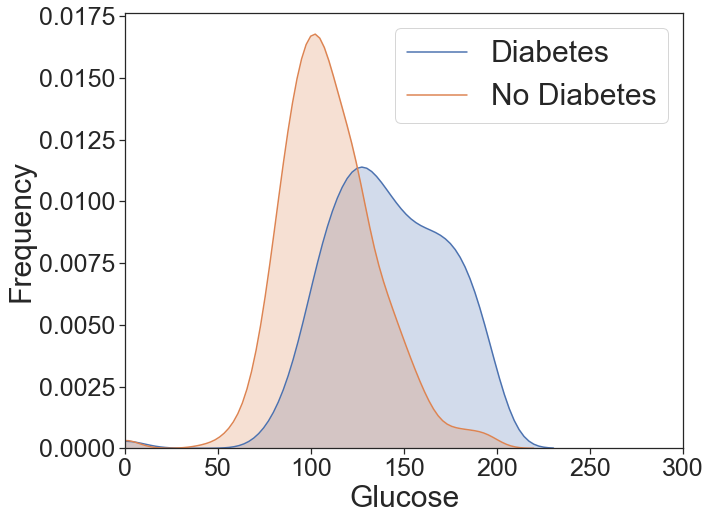

In [420]:
plt.figure(figsize=(10,8))

ax1 = sns.kdeplot(diabetes['Glucose'],shade=True)
ax1.set_xlim((0,300))
ax1.tick_params(labelsize=25)

ax2 = sns.kdeplot(not_diabetes['Glucose'],shade=True)
ax2.set_xlim((0,300))
ax2.tick_params(labelsize=25)

plt.legend(['Diabetes','No Diabetes'],loc='upper right',fontsize=30)
plt.xlabel('Glucose',fontsize=30)
plt.ylabel('Frequency',fontsize=30)


Text(0, 0.5, 'Frequency')

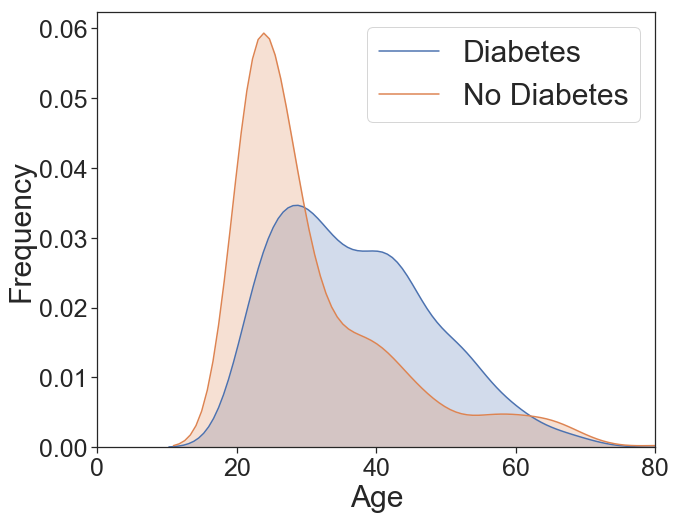

In [421]:
plt.figure(figsize=(10,8))

ax1 = sns.kdeplot(diabetes['Age'],shade=True)
ax1.set_xlim((0,80))
ax2.tick_params(labelsize=25)

ax2 = sns.kdeplot(not_diabetes['Age'],shade=True)
ax2.set_xlim((0,80))
ax2.tick_params(labelsize=25)

plt.legend(['Diabetes','No Diabetes'],loc='upper right',fontsize=30)
plt.xlabel('Age',fontsize=30)
plt.ylabel('Frequency',fontsize=30)

Text(0, 0.5, 'Frequency')

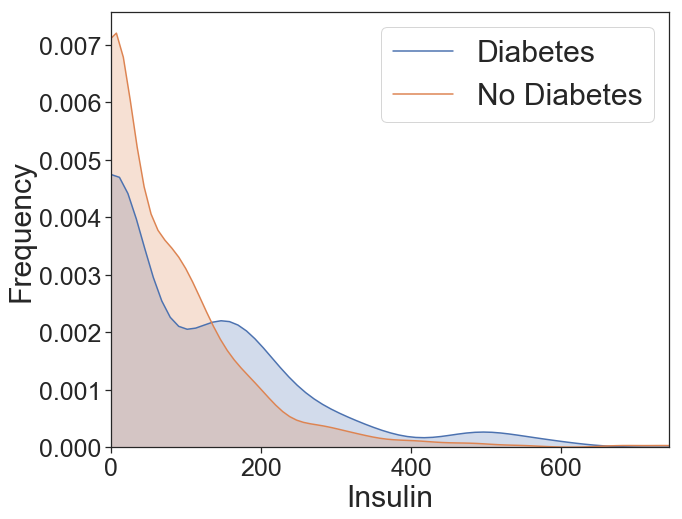

In [422]:
plt.figure(figsize=(10,8))

ax1 = sns.kdeplot(diabetes['Insulin'],shade=True)
ax1.set_xlim((0,max(diabetes['Insulin'])))
ax1.tick_params(labelsize=25)


ax2 = sns.kdeplot(not_diabetes['Insulin'],shade=True)
ax2.set_xlim((0,max(not_diabetes['Insulin'])))
ax2.tick_params(labelsize=25)

plt.legend(['Diabetes','No Diabetes'],loc='upper right',fontsize=30)
plt.xlabel('Insulin',fontsize=30)
plt.ylabel('Frequency',fontsize=30)

### Histogram

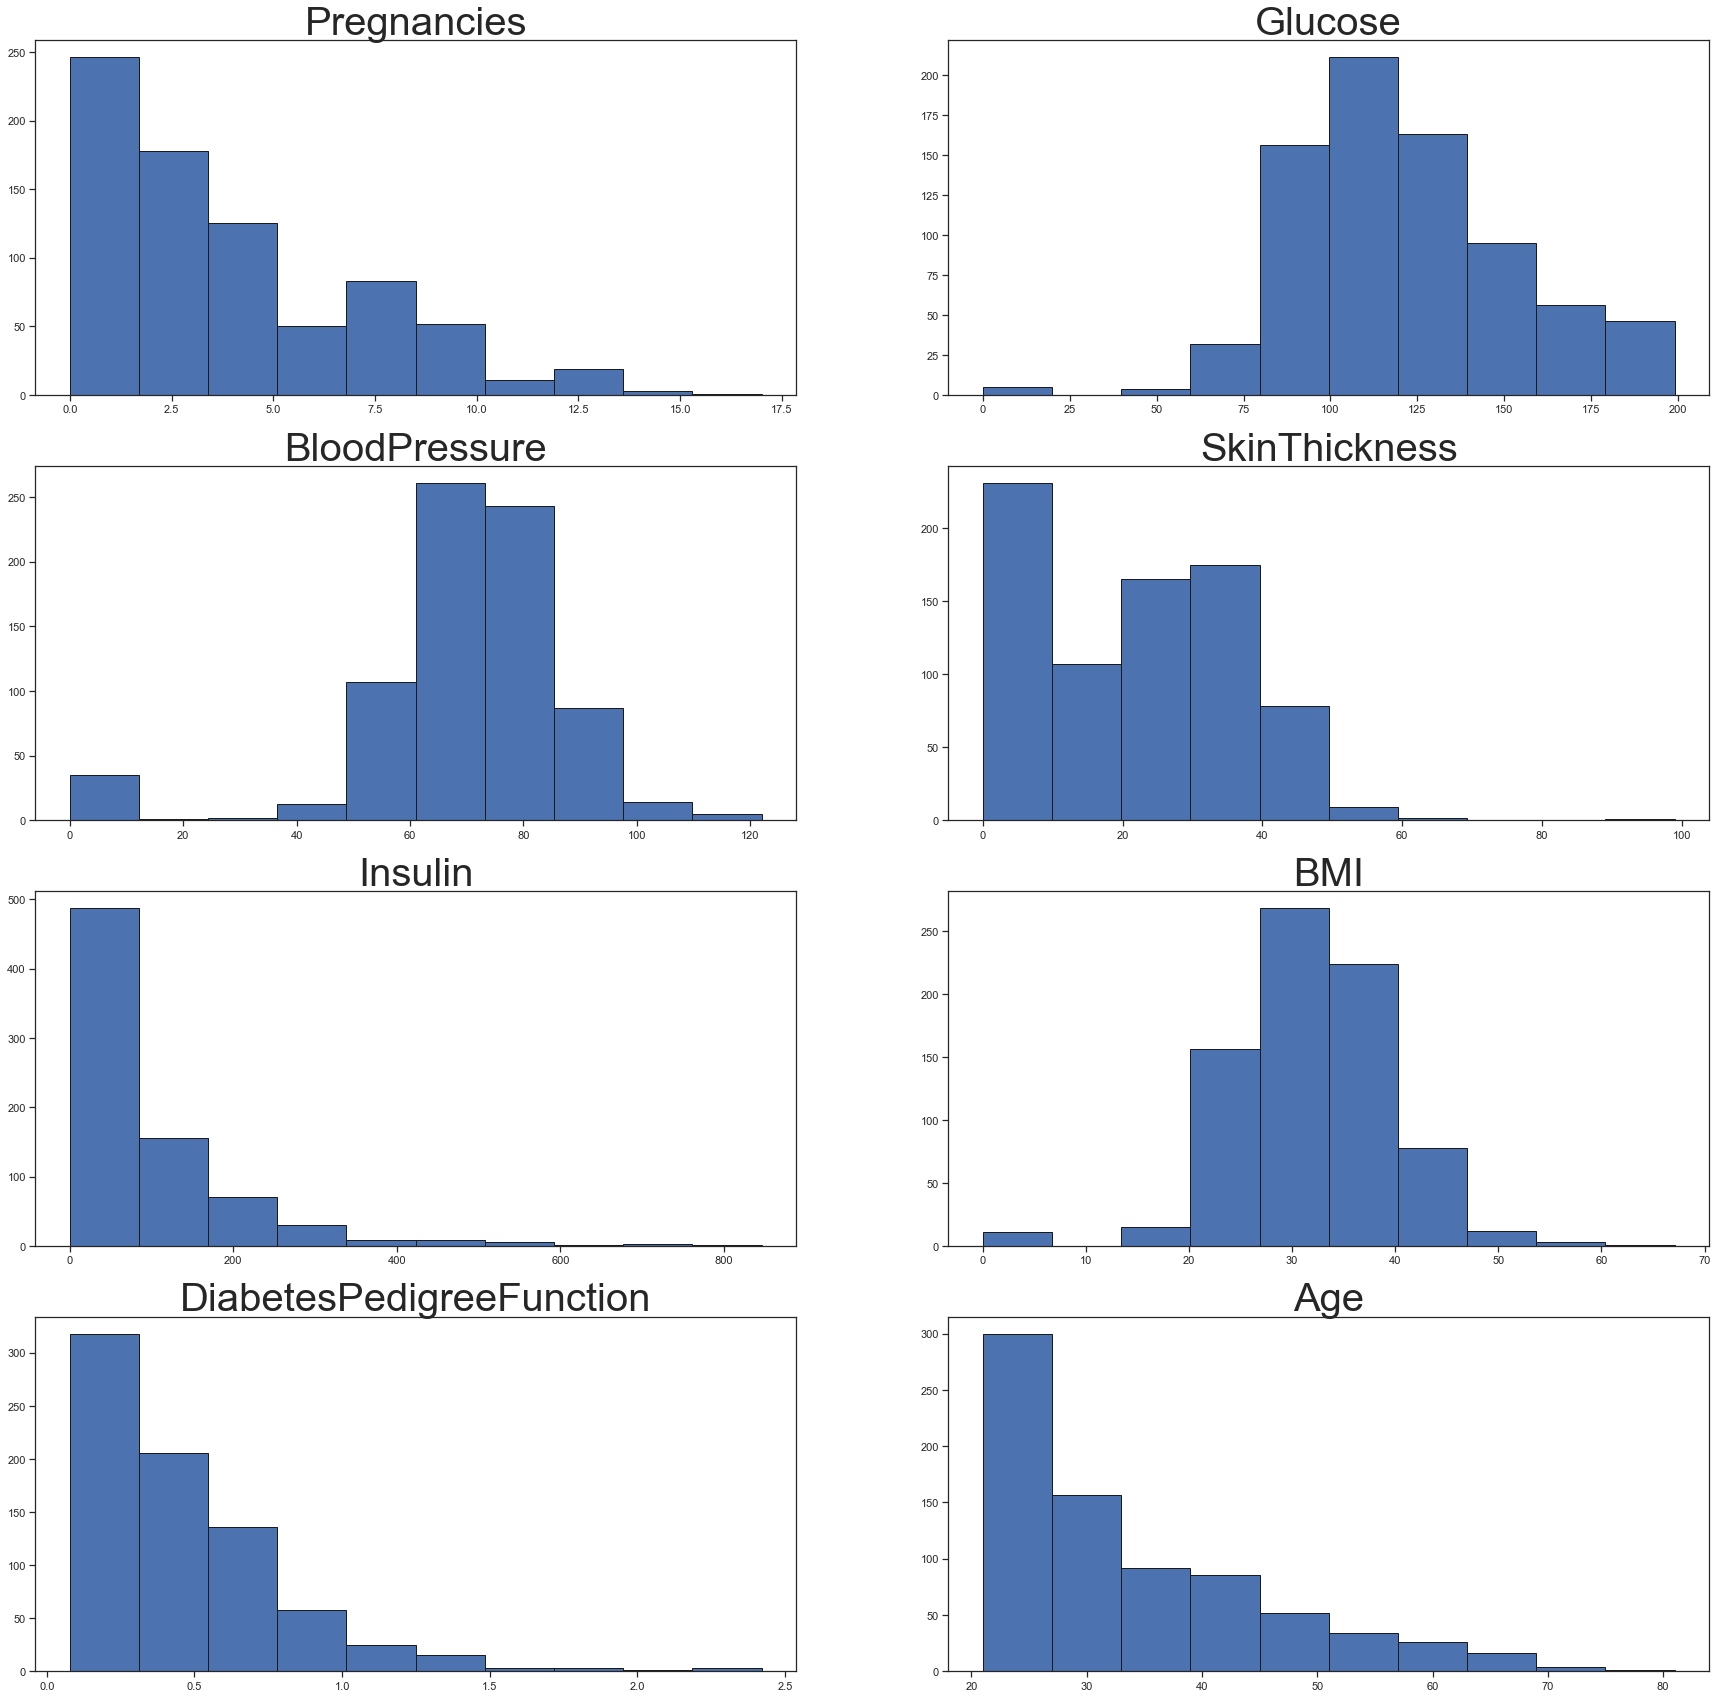

In [424]:
fig, axs = plt.subplots(4, 2, figsize=(30, 30))
ax = axs.flatten()
#fig.suptitle('Histogram of the variables', fontsize=50)

for i in range(len(names)):
    ax[i].hist(pima_dataset[names[i]],alpha=1,ec="k")
    ax[i].set_title(names[i],fontsize=40)

The data is unbalanced, so we have to do something about that!

### There's a lot of missing data, how to deal? Let's determining the missing values of this dataset.

In [568]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [569]:
pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's replace the null values to np.NAN for sum all.

In [570]:
pima_dataset.loc[pima_dataset["Glucose"] == 0.0, "Glucose"] = np.NAN
pima_dataset.loc[pima_dataset["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
pima_dataset.loc[pima_dataset["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
pima_dataset.loc[pima_dataset["Insulin"] == 0.0, "Insulin"] = np.NAN
pima_dataset.loc[pima_dataset["BMI"] == 0.0, "BMI"] = np.NAN

pima_dataset.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [571]:
table_missing = pima_dataset.isnull().sum()[1:6]

In [572]:
table_missing = table_missing.to_frame()

In [573]:
table_missing.columns = ['Qtd Missing Data']

In [574]:
table_missing

,Qtd Missing Data
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [575]:
print(table_missing.to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &  Qtd Missing Data \\
\midrule
Glucose       &                 5 \\
BloodPressure &                35 \\
SkinThickness &               227 \\
Insulin       &               374 \\
BMI           &                11 \\
\bottomrule
\end{tabular}



So we note, in this data set have 5 missing values por glucose, 35 for BloodPressure, 227 for SkinThickness, 374 for insulin and 11 for BMI.

### Replacing the value with the mean

Let's visualize this data using the missingno package.

In [576]:
import missingno as miss

In [580]:
pima_plot = pima_dataset.rename(columns={'Pregnancies': 'NP', 'Glucose': 'GP', 
                                        'BloodPressure': 'BP', 'SkinThickness': 'SKIN',
                                        'Insulin': 'INSULIN', 'BMI':'BMI', 'DiabetesPedigreeFunction':'DBF',
                                        'Age':'AGE'})

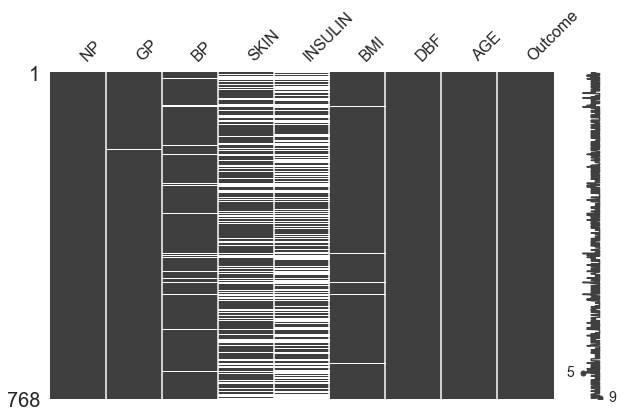

In [581]:
miss.matrix(pima_plot, figsize = (10, 6))

from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [27]:
imputer = imputer.fit(pima_dataset)

In [28]:
pima_dataset_missmean = imputer.transform(pima_dataset)

In [29]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [30]:
pima_dataset_mean = pd.DataFrame(pima_dataset_missmean, columns=columns)

In [31]:
pima_dataset_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


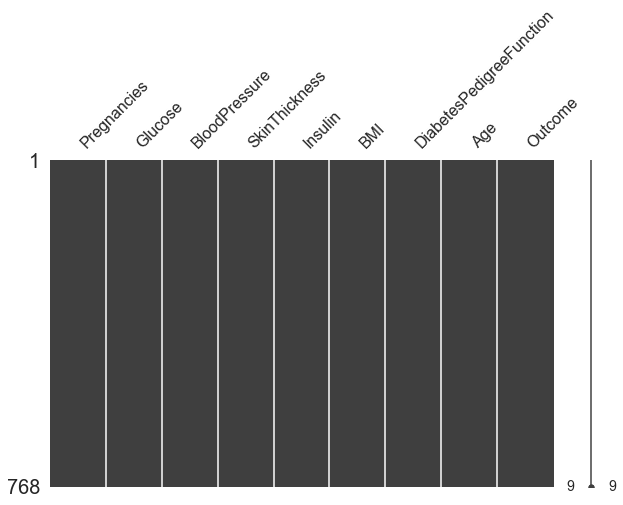

In [32]:
miss.matrix(pima_dataset_mean, figsize = (10, 6))

### Let's see now the histogram of the variables with the impute mean method

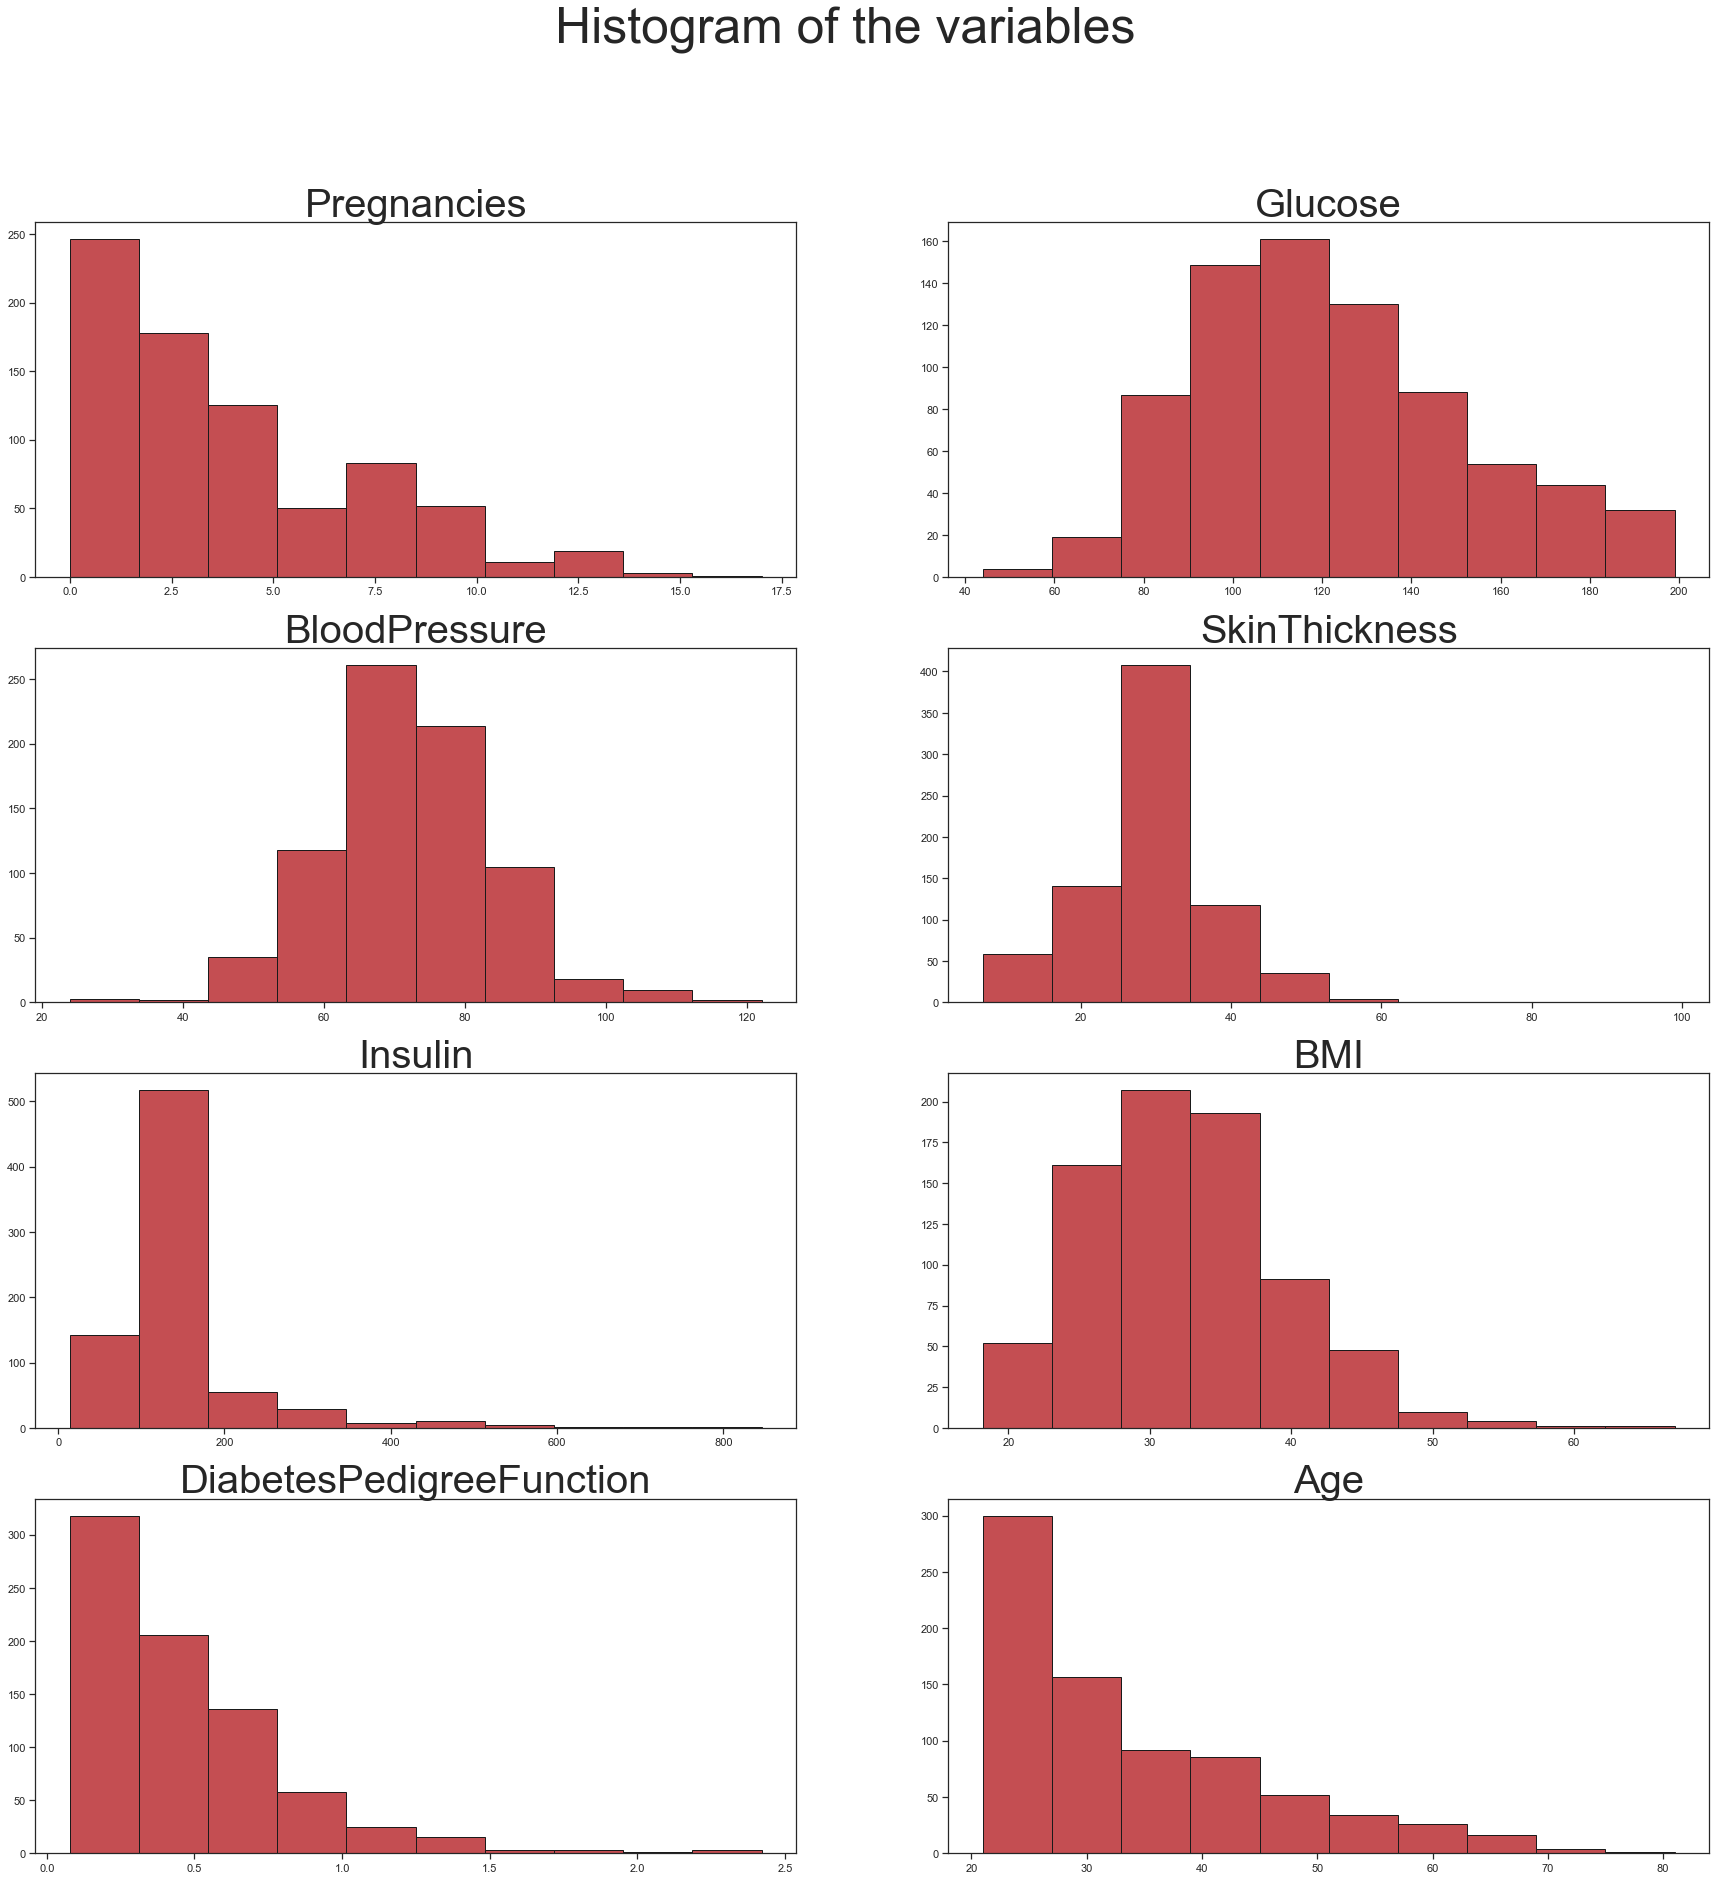

In [39]:
fig, axs = plt.subplots(4, 2, figsize=(30, 30))
ax = axs.flatten()
fig.suptitle('Histogram of the variables', fontsize=50)

for i in range(len(names)):
    ax[i].hist(pima_dataset_mean[names[i]],alpha=1,color='r',ec="k")
    ax[i].set_title(names[i],fontsize=40)

### Now let's compare the difference in the distribution of the variables with missing data and without missing data

In [94]:
from scipy import stats

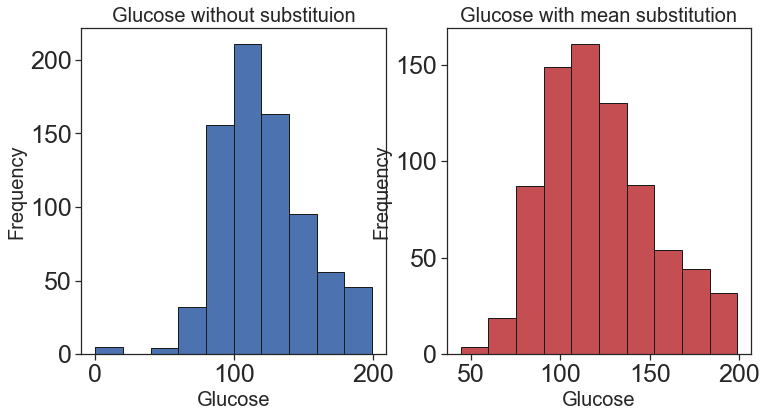

In [431]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs.flatten()
ax[0].set_title('Glucose without substituion',fontsize=20)
ax[0].hist(pima_dataset['Glucose'],alpha=1,ec="k",color='b')
ax[0].set_xlabel('Glucose',fontsize=20)
ax[0].set_ylabel('Frequency',fontsize=20)
ax[0].tick_params(labelsize=25)


ax[1].set_title('Glucose with mean substitution',fontsize=20)
ax[1].hist(pima_dataset_mean['Glucose'],alpha=1,ec="k",color='r')
ax[1].set_xlabel('Glucose',fontsize=20)
ax[1].set_ylabel('Frequency',fontsize=20)
ax[1].tick_params(labelsize=25)

Text(0, 0.5, 'Frequency')

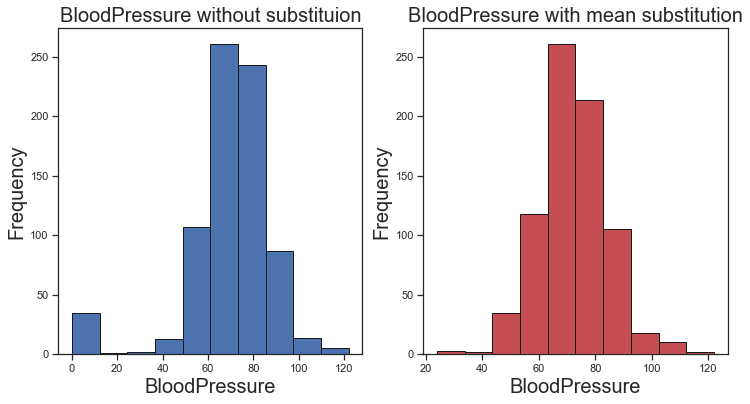

In [425]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs.flatten()
ax[0].set_title('BloodPressure without substituion',fontsize=20)
ax[0].hist(pima_dataset['BloodPressure'],alpha=1,ec="k",color='b')
ax[0].set_xlabel('BloodPressure',fontsize=20)
ax[0].set_ylabel('Frequency',fontsize=20)

ax[1].set_title('BloodPressure with mean substitution',fontsize=20)
ax[1].hist(pima_dataset_mean['BloodPressure'],alpha=1,ec="k",color='r')
ax[1].set_xlabel('BloodPressure',fontsize=20)
ax[1].set_ylabel('Frequency',fontsize=20)

Text(0, 0.5, 'Frequency')

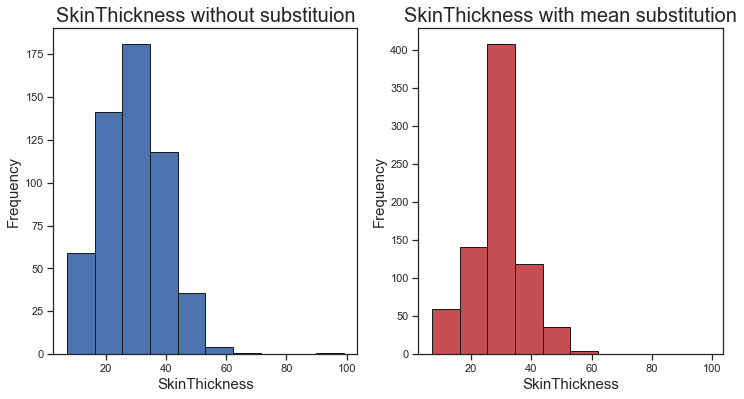

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs.flatten()
ax[0].set_title('SkinThickness without substituion',fontsize=20)
ax[0].hist(pima_dataset['SkinThickness'],alpha=1,ec="k",color='b')
ax[0].set_xlabel('SkinThickness',fontsize=15)
ax[0].set_ylabel('Frequency',fontsize=15)

ax[1].set_title('SkinThickness with mean substitution',fontsize=20)
ax[1].hist(pima_dataset_mean['SkinThickness'],alpha=1,ec="k",color='r')
ax[1].set_xlabel('SkinThickness',fontsize=15)
ax[1].set_ylabel('Frequency',fontsize=15)

Text(0, 0.5, 'Frequency')

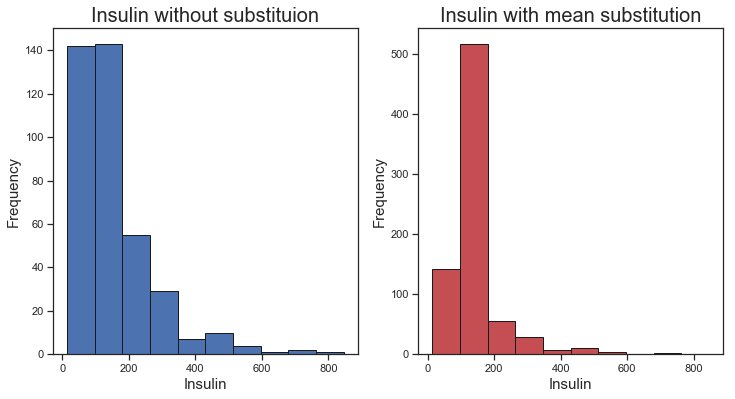

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs.flatten()
ax[0].set_title('Insulin without substituion',fontsize=20)
ax[0].hist(pima_dataset['Insulin'],alpha=1,ec="k",color='b')
ax[0].set_xlabel('Insulin',fontsize=15)
ax[0].set_ylabel('Frequency',fontsize=15)



ax[1].set_title('Insulin with mean substitution',fontsize=20)
ax[1].hist(pima_dataset_mean['Insulin'],alpha=1,ec="k",color='r')
ax[1].set_xlabel('Insulin',fontsize=15)
ax[1].set_ylabel('Frequency',fontsize=15)

Text(0, 0.5, 'Frequency')

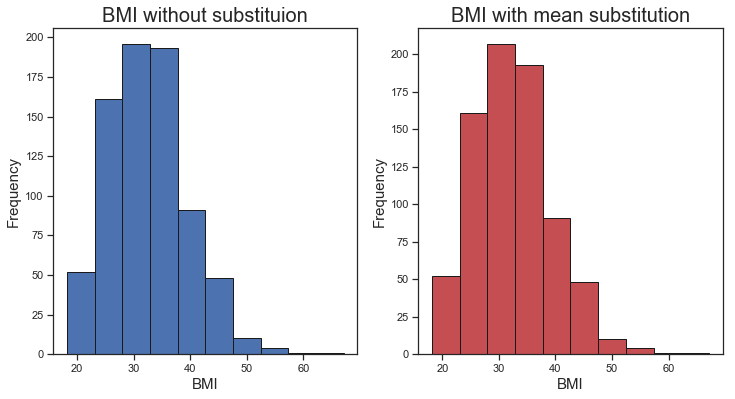

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs.flatten()
ax[0].set_title('BMI without substituion',fontsize=20)
ax[0].hist(pima_dataset['BMI'],alpha=1,ec="k",color='b')
ax[0].set_xlabel('BMI',fontsize=15)
ax[0].set_ylabel('Frequency',fontsize=15)

ax[1].set_title('BMI with mean substitution',fontsize=20)
ax[1].hist(pima_dataset_mean['BMI'],alpha=1,ec="k",color='r')
ax[1].set_xlabel('BMI',fontsize=15)
ax[1].set_ylabel('Frequency',fontsize=15)

### The covariables are correlated?

In [42]:
import seaborn as sns; sns.set()

In [43]:
corr = pima_dataset.iloc[:, :-1].corr()

In [44]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000


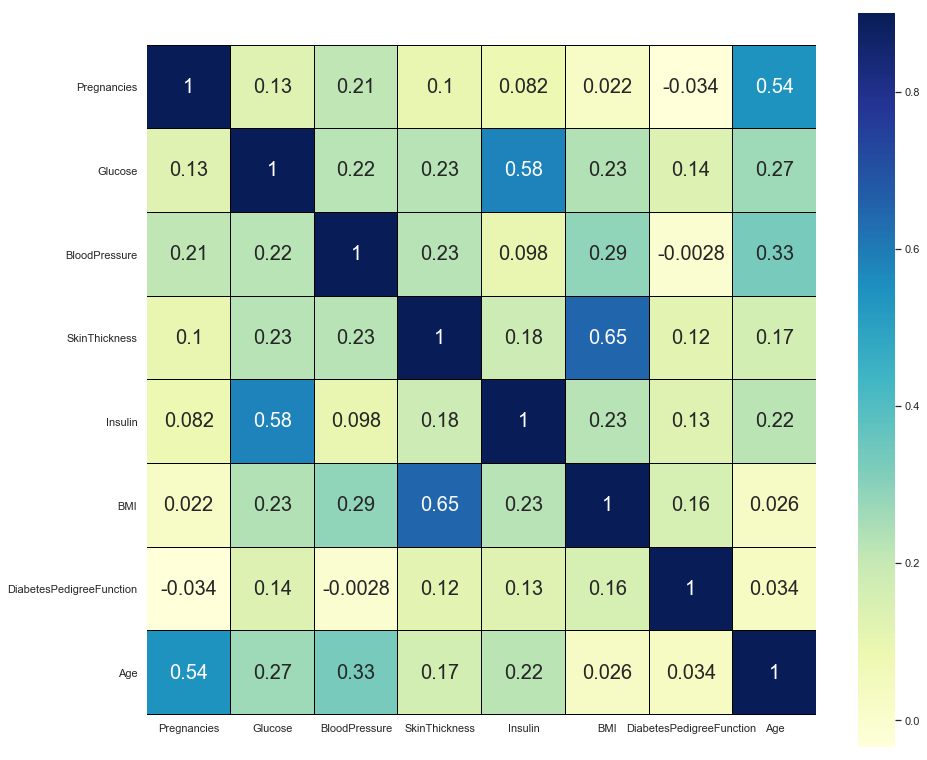

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=.9, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',cbar_kws={'shrink':.9}, linecolor="black",annot_kws = {'fontsize': 20})

### The data is balanced in the classes?

In [324]:
pima_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [325]:
heigths = [500,268]
bars_name = ('No Diabetes','Yes Diabetes')
y_pos = np.arange(len(bars_name))

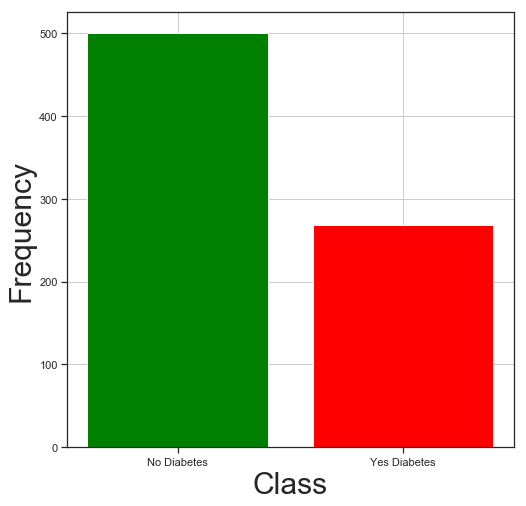

In [326]:
plt.figure(figsize=(8,8))
plt.bar(y_pos,heigths,color=['green','red'])
plt.xticks(y_pos,bars_name)
plt.xlabel('Class',fontsize=30)
plt.ylabel('Frequency',fontsize=30)
plt.grid()
plt.show()

The data is very unbalanced, we have 500 observations of patients without diabetes and 268 with diabetes.

## Modelling

In [145]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils.testing import ignore_warnings

In [100]:
### Libraries for the models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

For make the work easier let's define some functions.

In [101]:
@ignore_warnings(category=ConvergenceWarning)
def get_mean_accuracy(model, X, y): ## Essa função recebe um modelo e um conjunto de atributos e deve calcular a acurácia do modelo utilizando 10-fold cross-validation
    skf = StratifiedKFold(n_splits=10) # 10-fold cross validation estratificado
    accuracy = list() # Lista para salvar acurácia de cada fold

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    for train_index, test_index in skf.split(X,y):
        xtr, xvl = X.loc[train_index],X.loc[test_index]
        ytr, yvl = y.loc[train_index],y.loc[test_index]

    # Corrigindo o formato do ytr para ajustar o modelo
    ytr = ytr.to_numpy()
    ytr = ytr.reshape(len(ytr),)

    # Ajuste do modelo
    model.fit(xtr,ytr)

    # predição
    y_pred = model.predict(xvl)

    # Corigindo o formato do yvl para poder calcular a acurácia
    yvl = yvl.to_numpy()
    yvl = yvl.reshape(len(yvl),)

    # Calculando a acurácia
    accuracy.append(accuracy_score(yvl, y_pred))

    return(np.mean(accuracy)) ## Retornando a média de 10-fold cross validation


def evaluate_models(models, X, y):
  #Recebe um conjunto de modelos definidos por um dicionário e exibe, para cada modelo, seu nome seguido da sua acurácia usando a função get_mean_accuracy
  for i in range(len(models)):
    print('The accuracy of the model {} is {}' .format(list(models.keys())[i],get_mean_accuracy(list(models.values())[i],X,y)))

    
def create_name_list(models):
  #Essa função deve receber um dicionário e retornar uma lista contendo, para cada elemento do dicionário, uma tupla (chave, valor).
    name_list = []
    for i in range(len(models)):
        name_list.append((list(models.keys())[i], list(models.values())[i]))
    return name_list

What models we will use in this analysis:
- Naive Bayes
- Logistic Regression
- Support Vector Machine
- K Nearest Neighbours
- Decision Trees
- Random Forest
- Perceptron
- Multilayer Perceptron


Let's scale the data first of all

In [102]:
pima_dataset = pd.read_csv('diabetes.csv')

In [103]:
X = pima_dataset.iloc[:, :-1].values
y = pima_dataset.iloc[:, 8].values

In [104]:
from sklearn.preprocessing import scale
X = scale(X)

Now, let's create the experiments

In [582]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(solver='lbfgs'),
    "SVM with poly Kernel of degree 2": SVC(kernel = 'poly', degree=2, gamma='auto',probability=True),
    "KNN with 3 n_neighbors": KNeighborsClassifier(n_neighbors=3,weights='distance',p=1),
    "Decision Tree Using entropy": DecisionTreeClassifier(criterion='entropy',class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=600,criterion="gini",class_weight='balanced'),
    #"Perceptron": Perceptron(eta0=0.01, random_state=0, max_iter=1000,tol=0.10),
    "MLP with  hidden layers = (100,100)": MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000)
}

In [583]:
names_models = ['Naive Bayes','Logistic Regression','SVM with poly Kernel of degree 2','KNN with 3 n_neighbors',
                'Decision Tree Using entropy','Random Forest','MLP with  hidden layers = (100,100)']

###  Let's see the accuracy of the models, if we dont replace the missing values.

In [584]:
evaluate_models(models,X,y)

The accuracy of the model Naive Bayes is 0.7763157894736842
The accuracy of the model Logistic Regression is 0.8289473684210527
The accuracy of the model SVM with poly Kernel of degree 2 is 0.618421052631579
The accuracy of the model KNN with 3 n_neighbors is 0.75
The accuracy of the model Decision Tree Using entropy is 0.6710526315789473
The accuracy of the model Random Forest is 0.8026315789473685
The accuracy of the model MLP with  hidden layers = (100,100) is 0.7368421052631579


### Now let's see the accuracy of the models using the mean to replace the missing values.

In [585]:
evaluate_models(models,X1,y1)

The accuracy of the model Naive Bayes is 0.7763157894736842
The accuracy of the model Logistic Regression is 0.8421052631578947
The accuracy of the model SVM with poly Kernel of degree 2 is 0.6842105263157895
The accuracy of the model KNN with 3 n_neighbors is 0.75
The accuracy of the model Decision Tree Using entropy is 0.7631578947368421
The accuracy of the model Random Forest is 0.8157894736842105
The accuracy of the model MLP with  hidden layers = (100,100) is 0.7763157894736842


The accuracy have been improved using the mean substuition in most of the cases.

### ROC plot using those initial models

In [291]:
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [382]:
def plot_mean_roc(classifier,X,y,colors,name_model):
    cv = StratifiedKFold(n_splits=10)
    if isinstance(X, pd.core.frame.DataFrame):
        X = X.values
    if isinstance(y, pd.core.frame.DataFrame) or isinstance(y, pd.core.series.Series):
        y = y.values
        
    tprs = []
    fprs = []
    aucs = []
    
    mean_fpr = np.linspace(0, 1, 100)
    
    plt.figure(figsize=(10,10))
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        probs = classifier.predict_proba(X[test])
        probs = probs[:,1]
        auc = roc_auc_score(y[test], probs)
        fpr, tpr, thresholds = roc_curve(y[test], probs)
        
    
        interp_tpr = np.interp(mean_fpr, fpr, tpr)  
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
        fprs.append(fpr)
        aucs.append(auc)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    
    plt.plot(mean_fpr, mean_tpr, color=colors,
            label=r'ROC ' + name_model +'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=6, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=colors, alpha=.1)

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    
    plt.tick_params(labelsize=25)
    plt.ylabel('True positive Rate',fontsize=40)
    plt.xlabel('False negative Rate',fontsize=40)
    plt.legend(loc="lower right", prop={'size': 20})
    plt.grid()
    plt.show()
        

In [376]:
colors = ['m','k','g','b','r','c','y']

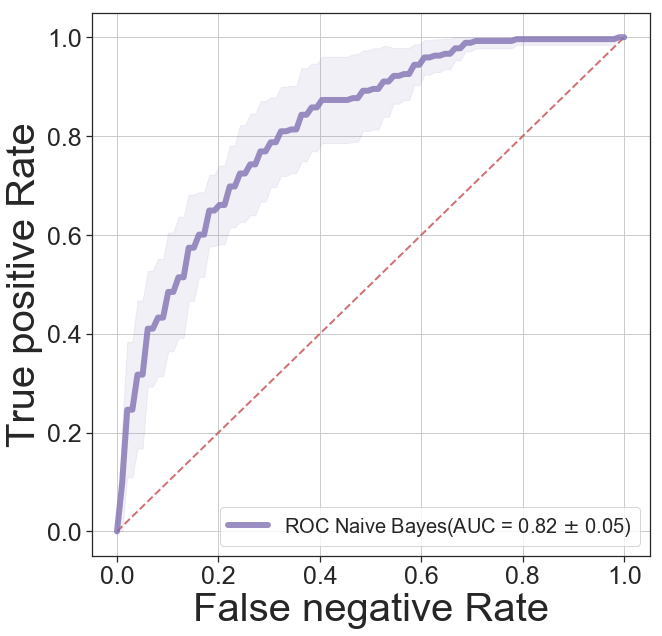

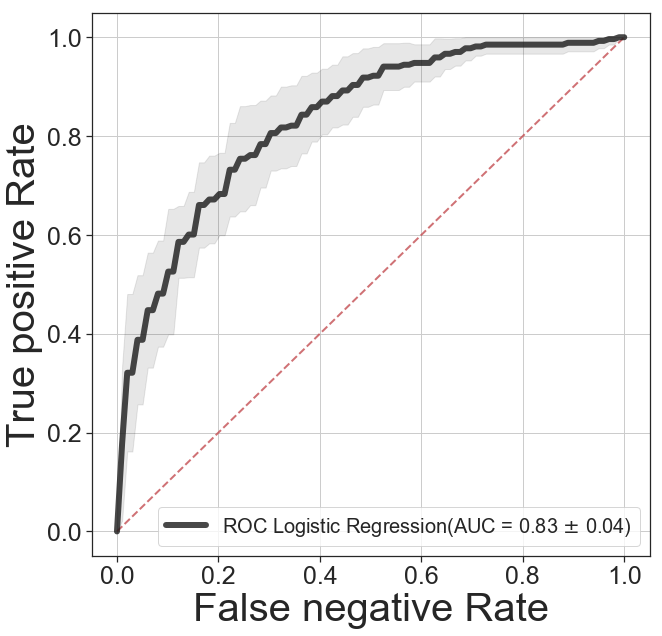

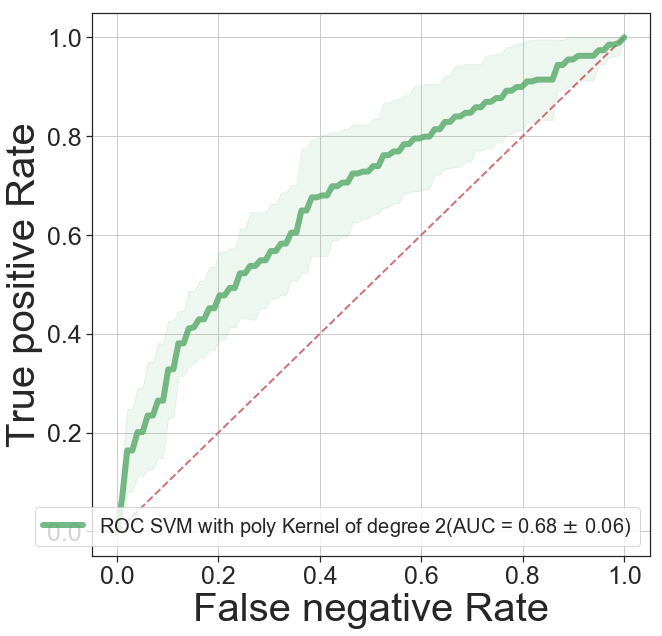

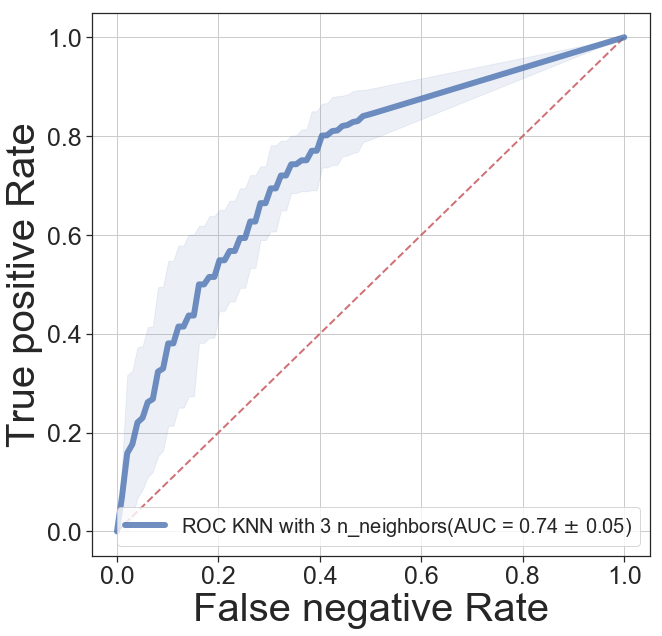

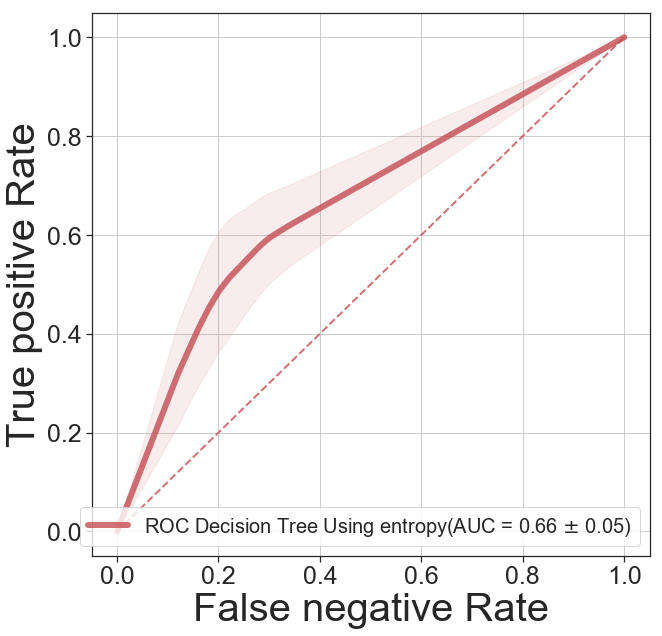

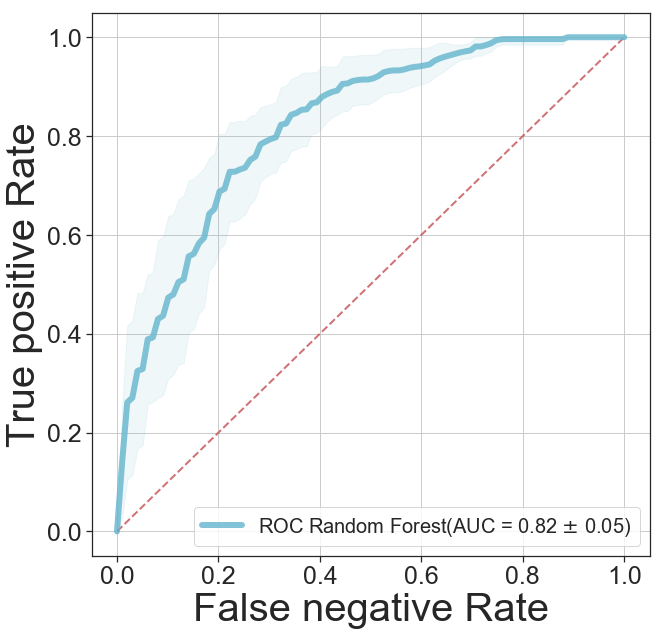

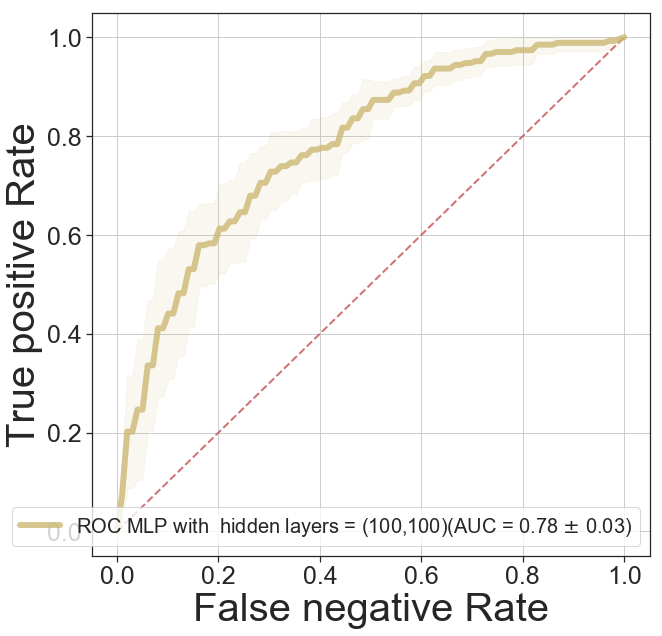

In [383]:
for i in range(len(names_models)):
    plot_mean_roc(models[names_models[i]], X,y,colors=colors[i],name_model=names_models[i])

## Imbalanced data - SMOTE: Synthetic Minority Over-sampling Technique

In [346]:
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN

In [347]:
dados_o, target_o = SMOTE().fit_sample(imputed_pima_dataset[imputed_pima_dataset.columns[:8]] , imputed_pima_dataset.Outcome)

In [348]:
target_o.value_counts()

0.0    500
1.0    500
Name: Outcome, dtype: int64

In [349]:
heigths = [500,500]
bars_name = ('No Diabetes','Yes Diabetes')
y_pos = np.arange(len(bars_name))

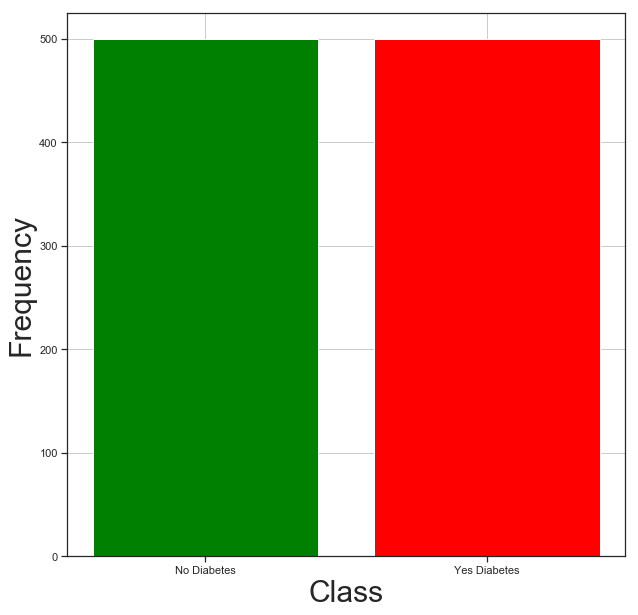

In [350]:
plt.figure(figsize=(10,10))
plt.bar(y_pos,heigths,color=['green','red'])
plt.xticks(y_pos,bars_name)
plt.xlabel('Class',fontsize=30)
plt.ylabel('Frequency',fontsize=30)
plt.grid()
plt.show()

Ok! Now the data is balanced. Let's test the models

In [351]:
X_ban = dados_o.values
y_ban = target_o.values

In [353]:
X_ban = scale(X_ban)

In [354]:
evaluate_models(models,X_ban,y_ban)

The accuracy of the model Naive Bayes is 0.75
The accuracy of the model Logistic Regression is 0.78
The accuracy of the model SVM with poly Kernel of degree 2 is 0.59
The accuracy of the model KNN with 3 n_neighbors is 0.85
The accuracy of the model Decision Tree Using entropy is 0.88
The accuracy of the model Random Forest is 0.9
The accuracy of the model MLP with  hidden layers = (100,100) is 0.87


We note, using the data balanced we have an improvement in the accuracy of the models.


### ROC curve using the data balanced in the classes(SMOTE)

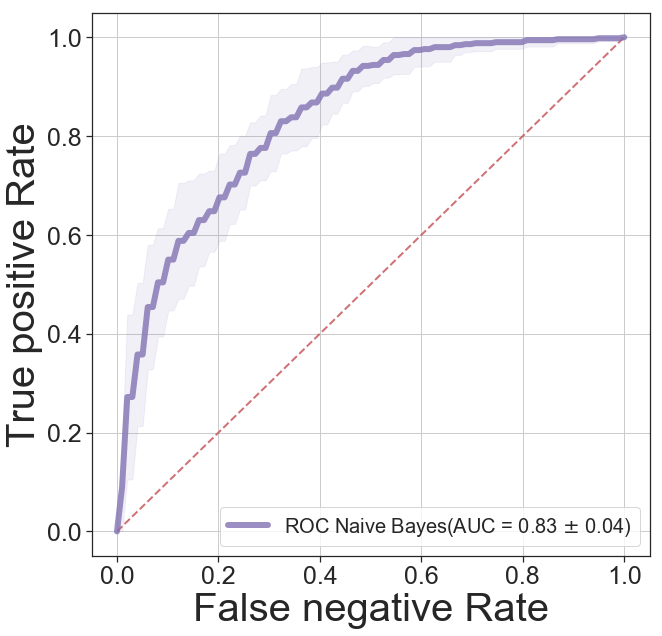

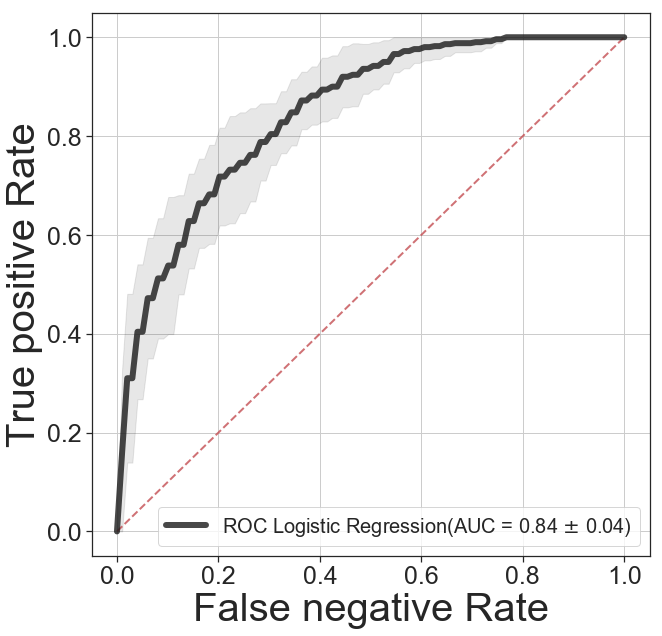

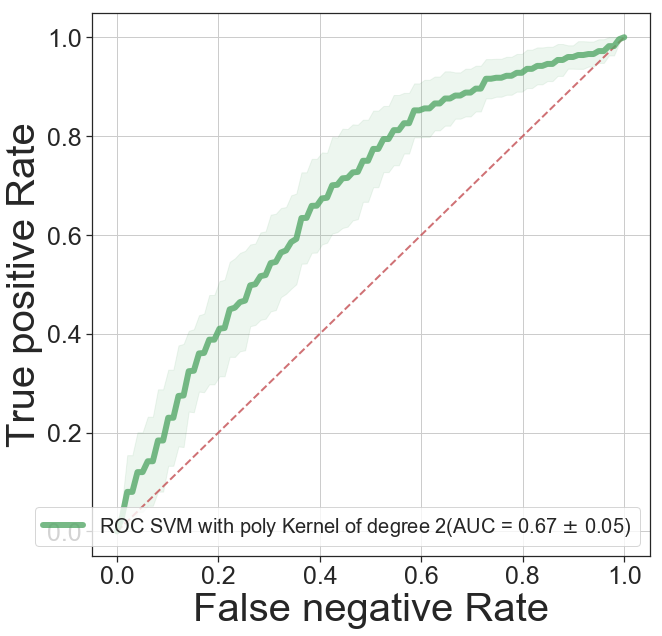

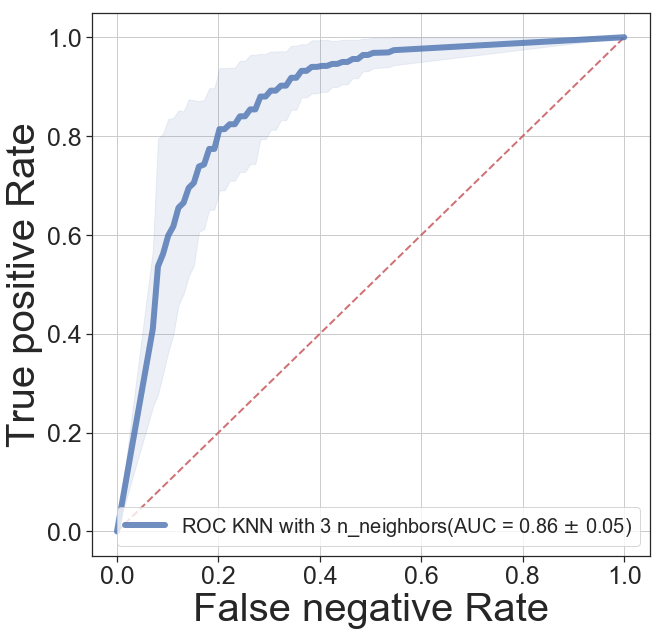

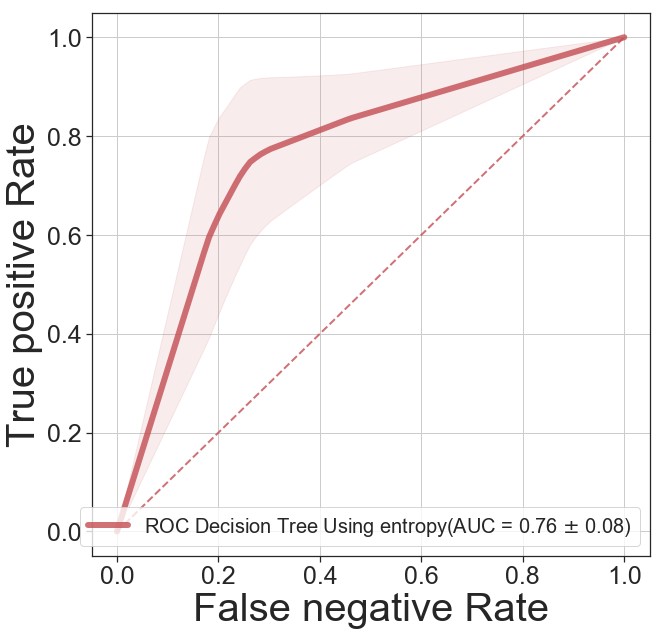

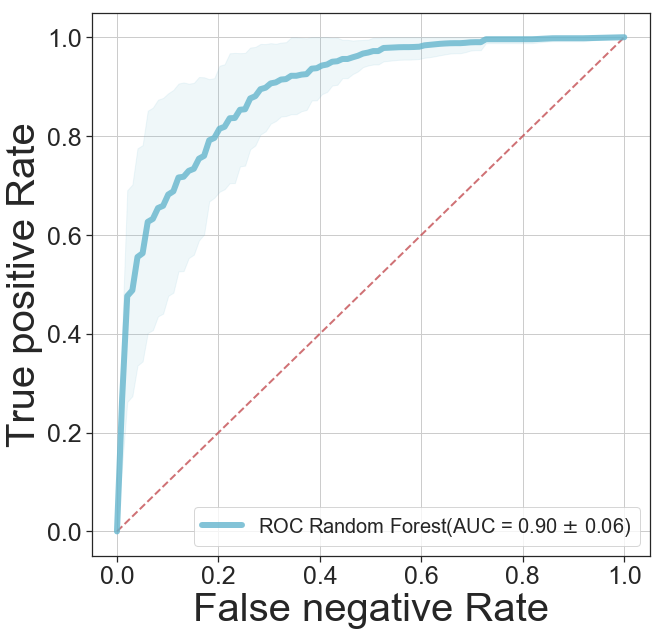

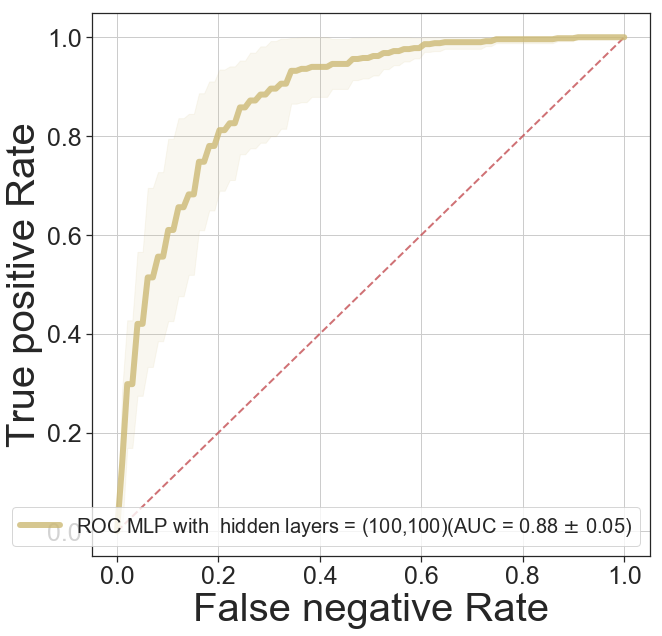

In [385]:
for i in range(len(names_models)):
    plot_mean_roc(models[names_models[i]], X_ban,y_ban,colors=colors[i],name_model=names_models[i])

## Function to return accuracy, precision, recall, f1_score of the models.

In [441]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

### Let's define some models just for see, after we will do some extensive analysis of each model

In [442]:
def get_mean_measures(model, X, y): ## Essa função recebe um modelo e um conjunto de atributos e deve calcular a acurácia do modelo utilizando 10-fold cross-validation
    skf = StratifiedKFold(n_splits=10) # 10-fold cross validation estratificado
    accuracy = list() # Lista para salvar acurácia de cada fold
    recall = list()
    precision = list()
    f1 = list()
    

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    for train_index, test_index in skf.split(X,y):
        xtr, xvl = X.loc[train_index],X.loc[test_index]
        ytr, yvl = y.loc[train_index],y.loc[test_index]

    # Corrigindo o formato do ytr para ajustar o modelo
    ytr = ytr.to_numpy()
    ytr = ytr.reshape(len(ytr),)

    # Ajuste do modelo
    model.fit(xtr,ytr)

    # predição
    y_pred = model.predict(xvl)

    # Corigindo o formato do yvl para poder calcular a acurácia
    yvl = yvl.to_numpy()
    yvl = yvl.reshape(len(yvl),)

    # Calculando a acurácia, recall, precision, f1
    accuracy.append(accuracy_score(yvl, y_pred))
    recall.append(recall_score(yvl,y_pred))
    precision.append(precision_score(yvl,y_pred,average='weighted'))
    f1.append(f1_score(yvl,y_pred, average='weighted'))

    return(np.mean(accuracy), np.mean(recall), np.mean(precision), np.mean(f1)) 

In [443]:
def measures_of_perfomance(models, X, y): ## função para retornar um df com as medidas de perfomance dos modelos
    df = pd.DataFrame()
    for i in range(len(models)):
        accuracy, recall, precision,f1_score = get_mean_measures(list(models.values())[i],X,y)
        results = { 
            'Accuracy' : [accuracy],
            'Recall' : [recall], 
            'Precision' : [precision],
            'f1-Score' : [f1_score]
        }
        df_results = pd.DataFrame(results, index=[list(models.keys())[i]])
        df = df.append(df_results)
    return df

In [444]:
df = measures_of_perfomance(models,X_ban,y_ban)

In [445]:
df

,Accuracy,Recall,Precision,f1-Score
Naive Bayes,0.75,0.72,0.750903,0.749775
Logistic Regression,0.78,0.74,0.781804,0.779647
SVM with poly Kernel of degree 2,0.59,0.54,0.590909,0.588972
KNN with 3 n_neighbors,0.85,0.94,0.861720,0.848775
Decision Tree Using entropy,0.88,0.90,0.880609,0.879952
Random Forest,0.89,0.94,0.893939,0.889724
"MLP with hidden layers = (100,100)",0.85,0.92,0.856997,0.849261


## Now let's consider every model with another Hyperparameters or configurations

### Naive Bayes

In [446]:
models_NB = {
    "Naive Bayes": GaussianNB()
}

In [447]:
df_NB = measures_of_perfomance(models_NB,X_ban,y_ban)

In [448]:
df_NB

,Accuracy,Recall,Precision,f1-Score
Naive Bayes,0.75,0.72,0.750903,0.749775


In [449]:
print(df_NB.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
Naive Bayes &      0.75 &    0.72 &   0.750903 &  0.749775 \\
\bottomrule
\end{tabular}



### Logistic Regression

In [450]:
models_LR = {
    "Logistic Regression": LogisticRegression(solver='lbfgs')
}

In [451]:
df_LR = measures_of_perfomance(models_LR,X_ban,y_ban)

In [452]:
df_LR

,Accuracy,Recall,Precision,f1-Score
Logistic Regression,0.78,0.74,0.781804,0.779647


In [453]:
print(df_LR.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
Logistic Regression &      0.78 &    0.74 &   0.781804 &  0.779647 \\
\bottomrule
\end{tabular}



### SVM with different Kernels

In [454]:
models_svm = {
    "SVM with poly Kernel of degree 2": SVC(kernel = 'poly', degree=2, gamma='auto'),
    "SVM with poly Kernel of degree 3":SVC(kernel = 'poly', degree=3, gamma='auto'),
    "SVM linear": SVC(kernel = 'linear'),
    "SVM with rbf Kernel": SVC(kernel = 'rbf',gamma='auto')
}    


In [455]:
df_SVM = measures_of_perfomance(models_svm,X_ban,y_ban)

In [456]:
df_SVM

,Accuracy,Recall,Precision,f1-Score
SVM with poly Kernel of degree 2,0.59,0.54,0.590909,0.588972
SVM with poly Kernel of degree 3,0.73,0.80,0.734598,0.728670
SVM linear,0.77,0.74,0.770976,0.769793
SVM with rbf Kernel,0.82,0.88,0.824675,0.819350


In [457]:
print(df_SVM.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
SVM with poly Kernel of degree 2 &      0.59 &    0.54 &   0.590909 &  0.588972 \\
SVM with poly Kernel of degree 3 &      0.73 &    0.80 &   0.734598 &  0.728670 \\
SVM linear                       &      0.77 &    0.74 &   0.770976 &  0.769793 \\
SVM with rbf Kernel              &      0.82 &    0.88 &   0.824675 &  0.819350 \\
\bottomrule
\end{tabular}



### K-Nearest-Neighbors

In [458]:
models_knn = {
    "KNN with 3nn, distance metric with p=1": KNeighborsClassifier(n_neighbors=3,weights='distance',p=1),
    "KNN with 3nn, distance metric with p=2": KNeighborsClassifier(n_neighbors=3,weights='distance',p=2),
    "KNN with 5nn, distance metric with p=1": KNeighborsClassifier(n_neighbors=5,weights='distance',p=1),
    "KNN with 5nn, distance metric with p=2": KNeighborsClassifier(n_neighbors=5,weights='distance',p=2)
}    


In [459]:
df_knn = measures_of_perfomance(models_knn,X_ban,y_ban)

In [460]:
df_knn

,Accuracy,Recall,Precision,f1-Score
"KNN with 3nn, distance metric with p=1",0.85,0.94,0.861720,0.848775
"KNN with 3nn, distance metric with p=2",0.82,0.92,0.833333,0.818182
"KNN with 5nn, distance metric with p=1",0.80,0.94,0.825521,0.796002
"KNN with 5nn, distance metric with p=2",0.83,0.94,0.846784,0.827918


In [461]:
print(df_knn.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
KNN with 3nn, distance metric with p=1 &      0.85 &    0.94 &   0.861720 &  0.848775 \\
KNN with 3nn, distance metric with p=2 &      0.82 &    0.92 &   0.833333 &  0.818182 \\
KNN with 5nn, distance metric with p=1 &      0.80 &    0.94 &   0.825521 &  0.796002 \\
KNN with 5nn, distance metric with p=2 &      0.83 &    0.94 &   0.846784 &  0.827918 \\
\bottomrule
\end{tabular}



### Decision trees

In [462]:
models_decision_tree = {
    "Decision Tree with gini criterion": DecisionTreeClassifier(criterion='gini',class_weight='balanced'),
    "Decision Tree with entropy criterion": DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
}    

In [463]:
df_decision_tree = measures_of_perfomance(models_decision_tree,X_ban,y_ban)

In [464]:
df_decision_tree

,Accuracy,Recall,Precision,f1-Score
Decision Tree with gini criterion,0.82,0.88,0.824675,0.819350
Decision Tree with entropy criterion,0.86,0.90,0.862319,0.859776


In [465]:
print(df_decision_tree.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
Decision Tree with gini criterion    &      0.82 &    0.88 &   0.824675 &  0.819350 \\
Decision Tree with entropy criterion &      0.86 &    0.90 &   0.862319 &  0.859776 \\
\bottomrule
\end{tabular}



### Random Forest 

In [466]:
models_RF  = {
    "Random Forest, n_estimators=100, Gini": RandomForestClassifier(n_estimators=100,criterion="gini",class_weight='balanced'),
    "Random Forest, n_estimators=100, Entropy": RandomForestClassifier(n_estimators=100,criterion="entropy",class_weight='balanced'),
    "Random Forest, n_estimators=600, Gini": RandomForestClassifier(n_estimators=600,criterion="gini",class_weight='balanced'),
    "Random Forest, n_estimators=600, Entropy": RandomForestClassifier(n_estimators=600,criterion="entropy",class_weight='balanced')
}

In [467]:
df_RF = measures_of_perfomance(models_RF,X_ban, y_ban)

In [468]:
df_RF

,Accuracy,Recall,Precision,f1-Score
"Random Forest, n_estimators=100, Gini",0.90,0.92,0.900641,0.899960
"Random Forest, n_estimators=100, Entropy",0.92,0.96,0.922705,0.919872
"Random Forest, n_estimators=600, Gini",0.89,0.92,0.891409,0.889901
"Random Forest, n_estimators=600, Entropy",0.90,0.94,0.902576,0.899840


In [469]:
print(df_RF.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
Random Forest, n\_estimators=100, Gini    &      0.90 &    0.92 &   0.900641 &  0.899960 \\
Random Forest, n\_estimators=100, Entropy &      0.92 &    0.96 &   0.922705 &  0.919872 \\
Random Forest, n\_estimators=600, Gini    &      0.89 &    0.92 &   0.891409 &  0.889901 \\
Random Forest, n\_estimators=600, Entropy &      0.90 &    0.94 &   0.902576 &  0.899840 \\
\bottomrule
\end{tabular}



### Multilayer Perceptron

In [506]:
models_MLP1= {
    "MLP with (1000,1000)(Activation logistic)": MLPClassifier(hidden_layer_sizes=(1000,1000),activation = 'logistic', max_iter=1000),
    "MLP with (1000,1000)(Activation identity)": MLPClassifier(hidden_layer_sizes=(1000,1000),activation = 'identity',max_iter=1000),
    "MLP with (1000,1000)(Activation tanh)": MLPClassifier(hidden_layer_sizes=(1000,1000),activation = 'tanh',max_iter=1000),
    "MLP with  (1000,1000)(Activation relu)": MLPClassifier(hidden_layer_sizes=(1000,1000),activation = 'relu',max_iter=1000)   
}

In [507]:
df_MLP1 = measures_of_perfomance(models_MLP1,X_ban,y_ban)

In [476]:
df_MLP1

,Accuracy,Recall,Precision,f1-Score
"MLP with (1000,1000)(Activation logistic)",0.78,0.76,0.780449,0.779912
"MLP with (1000,1000)(Activation identity)",0.78,0.76,0.780449,0.779912
"MLP with (1000,1000)(Activation tanh)",0.85,0.88,0.851265,0.849865
"MLP with (1000,1000)(Activation relu)",0.85,0.90,0.853535,0.849624


In [477]:
print(df_MLP1.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Recall &  Precision &  f1-Score \\
\midrule
MLP with (1000,1000)(Activation logistic) &      0.78 &    0.76 &   0.780449 &  0.779912 \\
MLP with (1000,1000)(Activation identity) &      0.78 &    0.76 &   0.780449 &  0.779912 \\
MLP with (1000,1000)(Activation tanh)     &      0.85 &    0.88 &   0.851265 &  0.849865 \\
MLP with  (1000,1000)(Activation relu)    &      0.85 &    0.90 &   0.853535 &  0.849624 \\
\bottomrule
\end{tabular}



### Using the  best three models to hyperparameter tunning
- KNN 
- Random Forest
- Multilayer Perceptron


**KNN**

In [510]:
from sklearn.model_selection import GridSearchCV

In [511]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p=[1,2]


#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


#Create new KNN object
knn_2 = KNeighborsClassifier()


#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)


#Fit the model
best_model = clf.fit(X_ban,y_ban)


#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [512]:
models_knn = {
    "KNN with 1nn, distance metric with p=1": KNeighborsClassifier(n_neighbors=1,weights='distance',leaf_size=1,p=1)
}


In [514]:
df_KNN= measures_of_perfomance(models_knn,X_ban,y_ban)

In [515]:
df_KNN

,Accuracy,Recall,Precision,f1-Score
"KNN with 1nn, distance metric with p=1",0.88,0.96,0.889984,0.879227


**Random Forest**

In [516]:
from sklearn.model_selection import RandomizedSearchCV

In [518]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [519]:
rf = RandomForestRegressor()

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_ban, y_ban)

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.1min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [520]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [530]:
models_RF  = {
    "Random Forest, n_estimators=400, Entropy": RandomForestClassifier(n_estimators=400,criterion="entropy",min_samples_split=2,
    min_samples_leaf=1, max_features='sqrt',class_weight='balanced')
}

In [531]:
df_RF= measures_of_perfomance(models_RF,X_ban,y_ban)

In [532]:
df_RF

,Accuracy,Recall,Precision,f1-Score
"Random Forest, n_estimators=400, Entropy",0.91,0.94,0.911481,0.909919


### Emsemble methods

In [533]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, VotingClassifier

Let's try to make an metaclassificator using only the best models.

In [555]:
best_models = {
    "MLP with (1000,1000)(Activation tanh)": MLPClassifier(hidden_layer_sizes=(1000,1000),activation = 'tanh',max_iter=1000),
    "Random Forest, n_estimators=600, Entropy": RandomForestClassifier(n_estimators=600,criterion="entropy",class_weight='balanced'),
    "KNN with 3nn, distance metric with p=1": KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
}

In [556]:
ensemble_best = create_name_list(best_models)

In [557]:
ensemble_best

[('MLP with (1000,1000)(Activation tanh)',
  MLPClassifier(activation='tanh', hidden_layer_sizes=(1000, 1000), max_iter=1000)),
 ('Random Forest, n_estimators=600, Entropy',
  RandomForestClassifier(class_weight='balanced', criterion='entropy',
                         n_estimators=600)),
 ('KNN with 3nn, distance metric with p=1',
  KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'))]

### Voting classifier

In [540]:
clf_ensemble = VotingClassifier(ensemble_best,voting='soft')

In [541]:
clf_ensemble

VotingClassifier(estimators=[('MLP with (1000,1000)(Activation tanh)',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(1000, 1000),
                                            max_iter=1000)),
                             ('Random Forest, n_estimators=600, Entropy',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     n_estimators=400)),
                             ('KNN with 3nn, distance metric with p=1',
                              KNeighborsClassifier(n_neighbors=1, p=1,
                                                   weights='distance'))],
                 voting='soft')

In [542]:
accuracy,precision,recall,f1 = get_mean_measures(clf_ensemble,X_ban,y_ban)

In [543]:
results = { 
            'Accuracy' : [accuracy],
            'Recall' : [recall], 
            'Precision' : [precision],
            'f1-Score' : [f1]
        }
    
    
    
df_ensemble = pd.DataFrame(results, index=['Voting Classifier'])


In [544]:
df_ensemble

,Accuracy,Recall,Precision,f1-Score
Voting Classifier,0.92,0.920673,0.94,0.919968


In [545]:
print(df_ensemble.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &    Recall &  Precision &  f1-Score \\
\midrule
Voting Classifier &      0.92 &  0.920673 &       0.94 &  0.919968 \\
\bottomrule
\end{tabular}



### ROC Curve for Voting Classifier

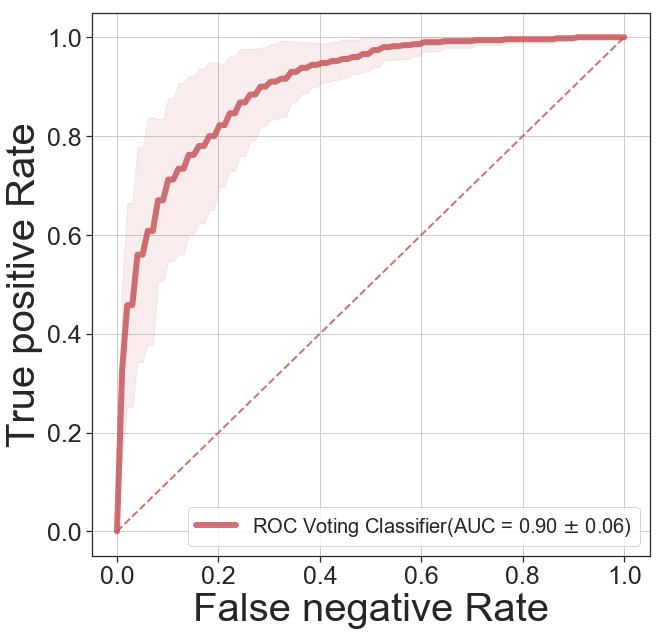

In [546]:
plot_mean_roc(clf_ensemble, X_ban,y_ban,colors='r',name_model='Voting Classifier')

### Stacking Classifier with a Neural network in final estimator

In [558]:
ensemble_best

[('MLP with (1000,1000)(Activation tanh)',
  MLPClassifier(activation='tanh', hidden_layer_sizes=(1000, 1000), max_iter=1000)),
 ('Random Forest, n_estimators=600, Entropy',
  RandomForestClassifier(class_weight='balanced', criterion='entropy',
                         n_estimators=600)),
 ('KNN with 3nn, distance metric with p=1',
  KNeighborsClassifier(n_neighbors=1, p=1, weights='distance'))]

In [559]:
clf_ensemble2 = StackingClassifier(ensemble_best, final_estimator=MLPClassifier(hidden_layer_sizes=(1000,1000)))

In [560]:
accuracy,precision,recall,f1 = get_mean_measures(clf_ensemble2,X_ban,y_ban)

In [561]:
results2 = { 
            'Accuracy' : [accuracy],
            'Recall' : [recall], 
            'Precision' : [precision],
            'f1-Score' : [f1]
        }
    
    
    
df_ensemble2 = pd.DataFrame(results2, index=['Stacking Classifier'])

In [551]:
df_ensemble2

,Accuracy,Recall,Precision,f1-Score
Stacking Classifier,0.92,0.920673,0.94,0.919968


In [552]:
print(df_ensemble2.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &    Recall &  Precision &  f1-Score \\
\midrule
Stacking Classifier &      0.92 &  0.920673 &       0.94 &  0.919968 \\
\bottomrule
\end{tabular}



### ROC curve for Stacking Classifier

C:\Users\Gulherme\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Gulherme\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


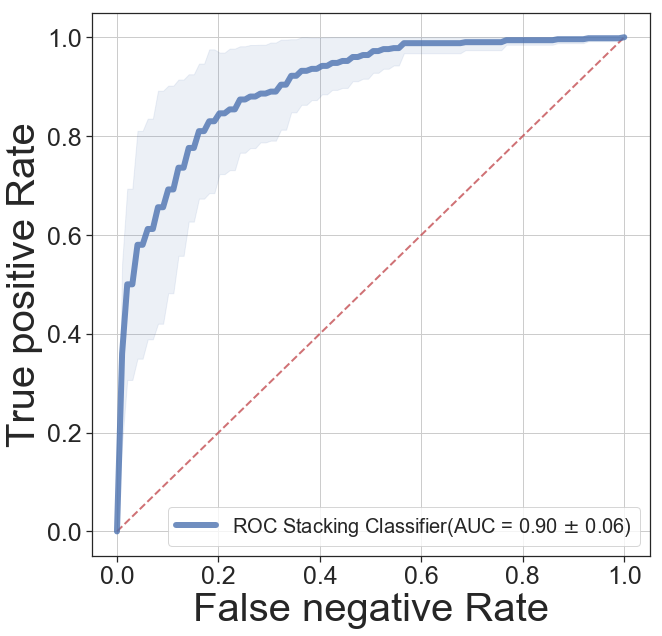

In [553]:
plot_mean_roc(clf_ensemble2, X_ban,y_ban,colors='b',name_model='Stacking Classifier')